Load and Preprocess MNIST Data

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


data visualization before augmentation

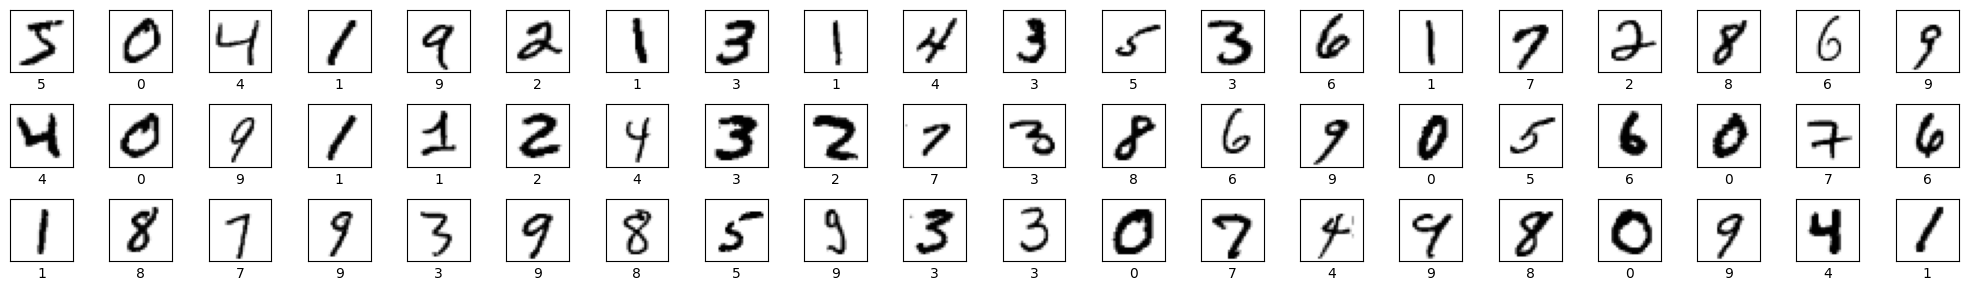

In [ ]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

data augmentation

In [ ]:

datagen = ImageDataGenerator(
    rotation_range=35,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,

)

datagen.fit(x_train)


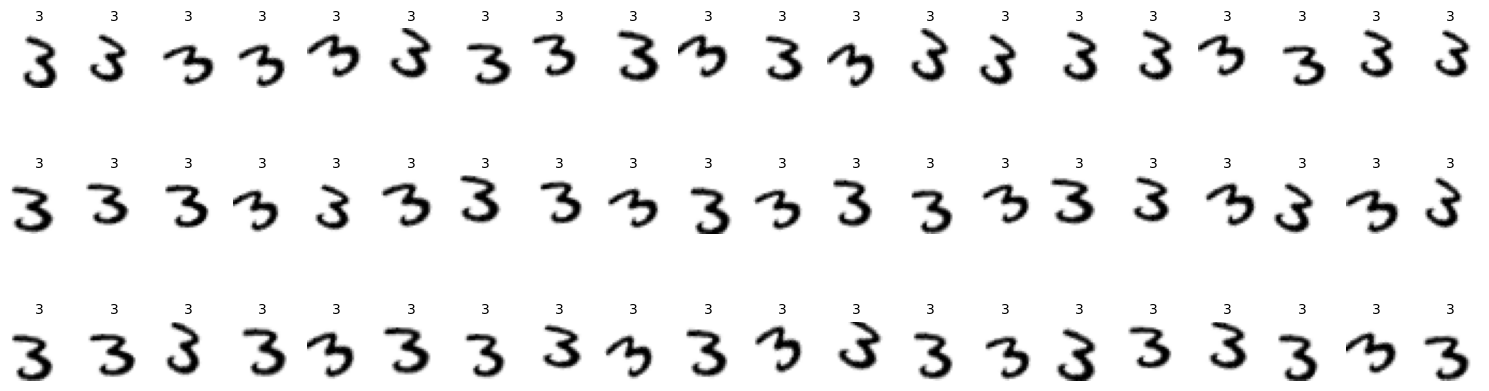

In [ ]:
sample_img = x_train[12].reshape(1,28,28,1)
sample_label = y_train[12]

aug_iter = datagen.flow(sample_img, batch_size=1)

plt.figure(figsize=(15,5))
for i in range(ROWS*COLS):
    batch = next(aug_iter)
    aug_image = batch[0].reshape(28,28)
    plt.subplot(ROWS, COLS, i+1)
    plt.imshow(aug_image, cmap='gray_r')
    plt.title(str(sample_label), fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


Define the CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),

    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

Compile the CNN model

In [ ]:
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Train the CNN Model

In [ ]:
x_train_aug, x_val, y_train_aug, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    datagen.flow(x_train_aug, y_train_aug, batch_size=64),
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 24ms/step - accuracy: 0.6610 - loss: 1.0804 - val_accuracy: 0.9728 - val_loss: 0.0866
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9199 - loss: 0.2612 - val_accuracy: 0.9835 - val_loss: 0.0567
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9401 - loss: 0.1983 - val_accuracy: 0.9802 - val_loss: 0.0716
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9476 - loss: 0.1700 - val_accuracy: 0.9843 - val_loss: 0.0497
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9519 - loss: 0.1591 - val_accuracy: 0.9861 - val_loss: 0.0480
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9556 - loss: 0.1454 - val_accuracy: 0.9835 - val_loss: 0.0525
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9606 - loss: 0.1336 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9622 - loss: 0.1283 - val_accurac

Plot Training History

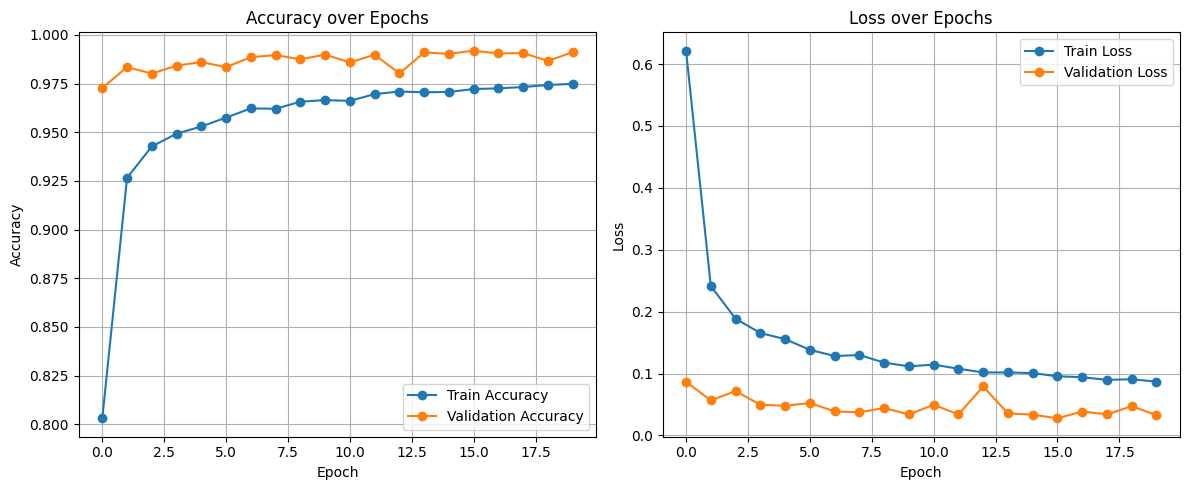

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], 'o-', label='Validation Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Evaluate the CNN Model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0271
Test Loss:  0.024575695395469666
Test Accuracy:  0.9923999905586243


mount drive for save the model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


save the model in drive

In [ ]:
save_path = '/content/drive/MyDrive/Digit_CVPR/digit_minst_cnn_model.h5'
model.save(save_path)
print(f"Model saved successfully at {save_path}")




Model saved successfully at /content/drive/MyDrive/Digit_CVPR/digit_minst_cnn_model.h5
